# **Titanic Dataset Overview**
The **Titanic dataset** is a classic dataset widely used in data science and machine learning. It contains information about the passengers of the Titanic, which tragically sank on its maiden voyage on **April 15, 1912**. The data provides details such as the passengers' demographic information, ticket class, survival status, and more.

# **Objective**
The primary goal of this analysis is to perform **Exploratory Data Analysis (EDA)** on the Titanic dataset to uncover patterns and insights, such as:

* Understanding the distribution of passengers across various attributes.
* Identifying any relationships between features (e.g., ticket class and survival).
* Spotting trends, anomalies, and outliers in the data.



# **Key Features:**
The dataset includes the following key columns:

* **PassengerId:** A unique identifier for each passenger.
* **Survived:** Indicates whether the passenger survived (1) or not (0).
* **Pclass:** The ticket class of the passenger (1st, 2nd, or 3rd class).
* **Name:** The full name of the passenger.
* **Sex:** Gender of the passenger.
* **Age:** Age of the passenger.
* **SibSp:** Number of siblings/spouses aboard.
* **Parch:** Number of parents/children aboard.
* **Ticket:** Ticket number.
* **Fare:** Fare paid by the passenger.
* **Cabin:** Cabin number.
* **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).






# **Step : 1 Load the Dataset**

In [4]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Titanic.csv')

# Display the first few rows
print(df.head())



   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [5]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [6]:
# Summary statistics of numerical columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


# **Step : 2 Data Cleaning**

**1. Handle Missing Values**

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Example: Filling missing 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Example: Dropping rows with missing 'Cabin' (if necessary)
df.drop(columns=['Cabin'], inplace=True)

# Example: Filling missing 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify no missing values remain
print("\nUpdated missing values:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Updated missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


<ipython-input-7-08ec50971fc1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-08ec50971fc1>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**2. Remove Duplicates**

In [8]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify no duplicates remain
print("\nUpdated number of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 0

Updated number of duplicate rows: 0


**3. Identify and Handle Outliers**

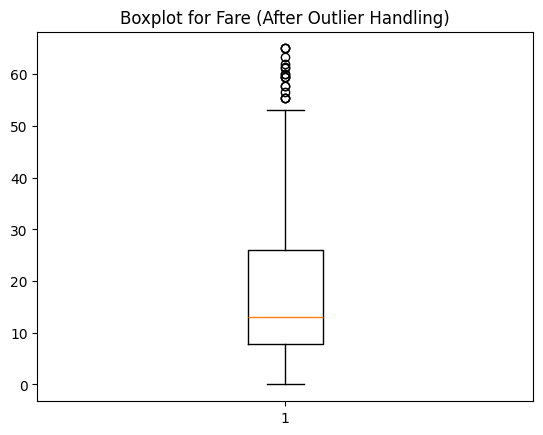

In [9]:
import matplotlib.pyplot as plt

# Handling outliers in 'Fare' using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Verify outlier handling
plt.boxplot(df['Fare'])
plt.title('Boxplot for Fare (After Outlier Handling)')
plt.show()


# **Step 4: Visualizations**


**1. Bar Charts for Categorical Variables**

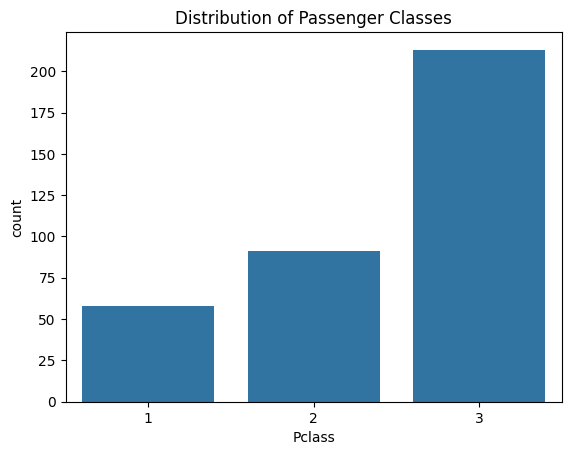

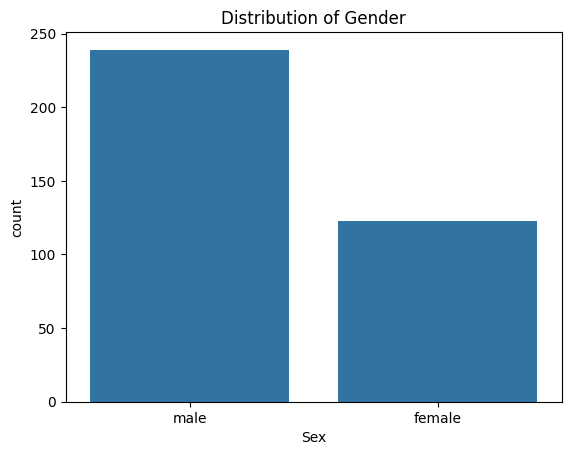

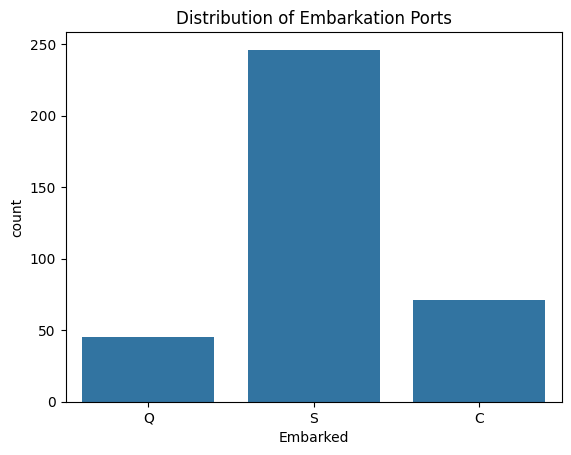

In [12]:
import seaborn as sns

# Bar chart for Passenger Class (Pclass)
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Classes')
plt.show()

# Bar chart for Gender (Sex)
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Gender')
plt.show()

# Bar chart for Embarked (Embarkation Port)
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarkation Ports')
plt.show()


**2. Histograms for Numerical Distributions**

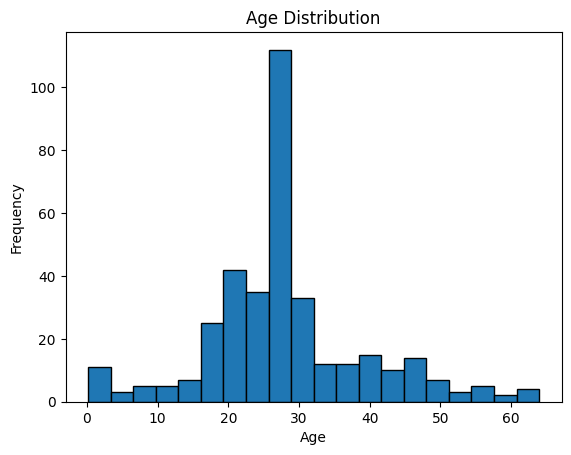

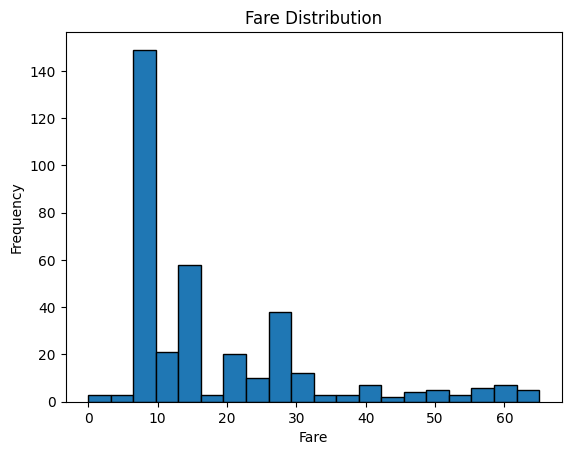

In [13]:
# Histogram for Age
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Fare
plt.hist(df['Fare'], bins=20, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


**3. Correlation Heatmap**

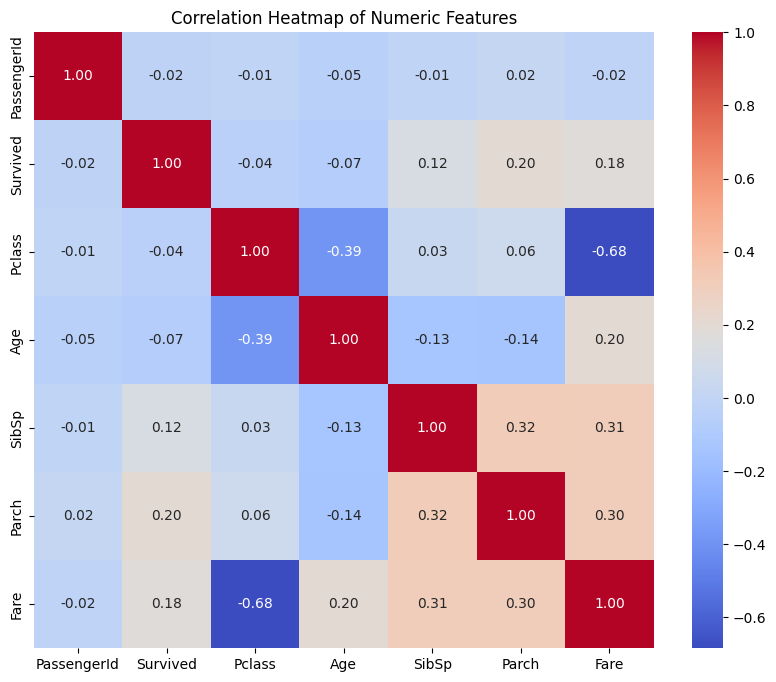

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()



<Axes: xlabel='Sex'>

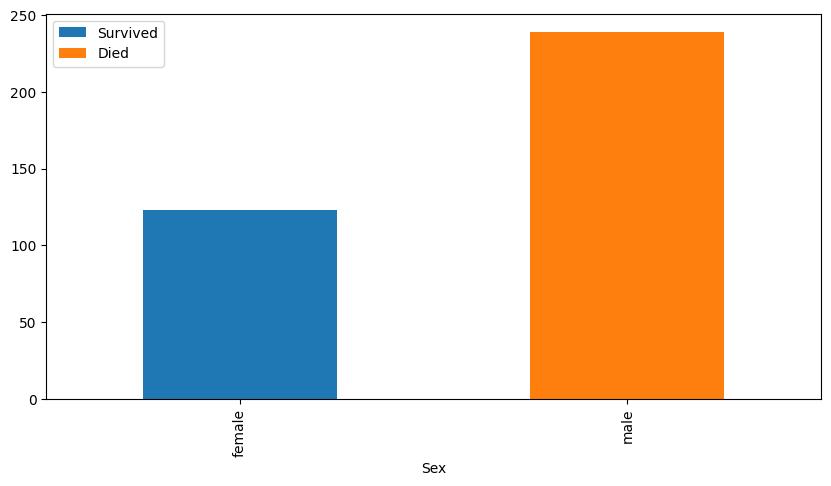

In [16]:
#Visualizing survivals based on gender
df['Died'] = 1 - df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

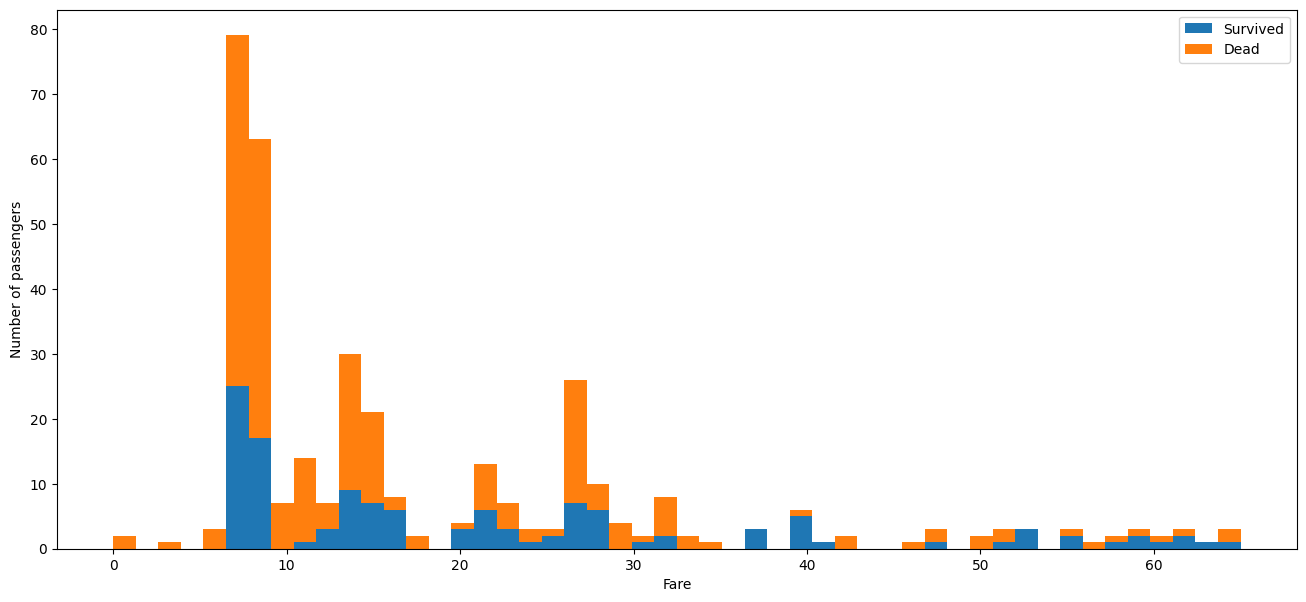

In [17]:
##Visualizing survivals based on fare
figure = plt.figure(figsize=(16, 7))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()